<a href="https://colab.research.google.com/github/manojnair007/AAI-501/blob/main/Project_Automotive_Vehicle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement
Predictive Maintenance for Engine Health Monitoring
In real-world applications, organizations operating vehicle fleets, industrial engines, or power generators need to monitor engine conditions for predictive maintenance. A failure in an engine can lead to costly downtime, safety hazards, and increased maintenance costs.

This project aims to:

Classify Engine Health Status:

  Use classification models (e.g., Decision Trees, Random Forest, or Neural Networks) to predict whether an engine is in a healthy or faulty state.

  Cluster Engine Performance Profiles: Use unsupervised clustering (e.g., K-Means, DBSCAN) to group engines with similar operational characteristics and identify patterns that indicate potential failures.

  Optimize Feature Selection & Hyperparameters: Experiment with feature selection to remove redundant attributes and hyperparameter tuning for model optimization.

In [ ]:
import pandas as pd
import numpy as np

from google.colab import files
uploaded = files.upload()




Saving engine_data.csv to engine_data.csv


In [ ]:
df = pd.read_csv('engine_data.csv')

# Display basic information about the dataset
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


(None,
    Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
 0         700          2.493592      11.790927          3.178981   
 1         876          2.941606      16.193866          2.464504   
 2         520          2.961746       6.553147          1.064347   
 3         473          3.707835      19.510172          3.727455   
 4         619          5.672919      15.738871          2.052251   
 
    lub oil temp  Coolant temp  Engine Condition  
 0     84.144163     81.632187                 1  
 1     77.640934     82.445724                 0  
 2     77.752266     79.645777                 1  
 3     74.129907     71.774629                 1  
 4     78.396989     87.000225                 0  )

Dataset Overview
The dataset consists of 19,535 records with 7 columns, which include:

1. Engine rpm (int)
2. Lub oil pressure (float)
Fuel pressure (float)
Coolant pressure (float)
Lub oil temp (float)
Coolant temp (float)
Engine Condition (int) → Target variable (0 or 1)
The "Engine Condition" column appears to be a binary classification label, indicating whether the engine is in a healthy (0) or faulty (1) condition.




In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check for missing values
missing_values = df.isnull().sum()

# Summary statistics
summary_stats = df.describe()

# Check for duplicate records
duplicate_count = df.duplicated().sum()


# Show results
print("\n missing values: ")
print(missing_values)
print("\n duplicate values: ", duplicate_count)
print("\n summary analysis:")
print(summary_stats)



 missing values: 
Engine rpm          0
Lub oil pressure    0
Fuel pressure       0
Coolant pressure    0
lub oil temp        0
Coolant temp        0
Engine Condition    0
dtype: int64

 duplicate values:  0

 summary analysis:
         Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
count  19535.000000      19535.000000   19535.000000      19535.000000   
mean     791.239263          3.303775       6.655615          2.335369   
std      267.611193          1.021643       2.761021          1.036382   
min       61.000000          0.003384       0.003187          0.002483   
25%      593.000000          2.518815       4.916886          1.600466   
50%      746.000000          3.162035       6.201720          2.166883   
75%      934.000000          4.055272       7.744973          2.848840   
max     2239.000000          7.265566      21.138326          7.478505   

       lub oil temp  Coolant temp  Engine Condition  
count  19535.000000  19535.000000      19535.00000

<Figure size 1200x800 with 0 Axes>

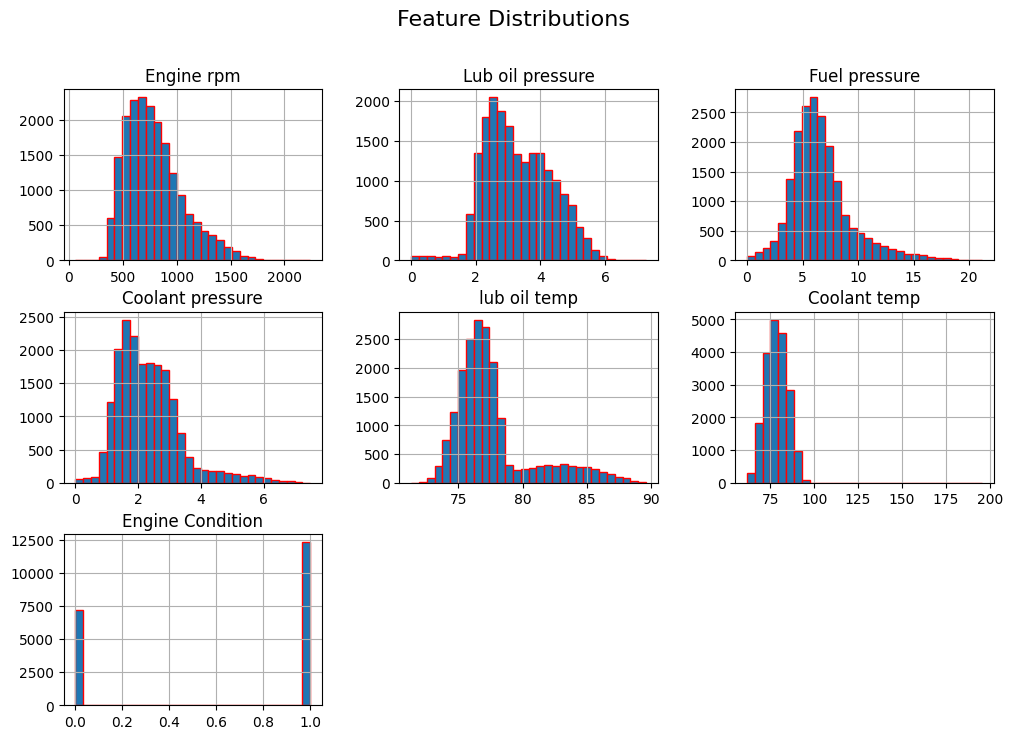

In [ ]:
# Plot distributions of numerical features
plt.figure(figsize=(12, 8))
df.hist(figsize=(12, 8), bins=30, edgecolor='red')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()



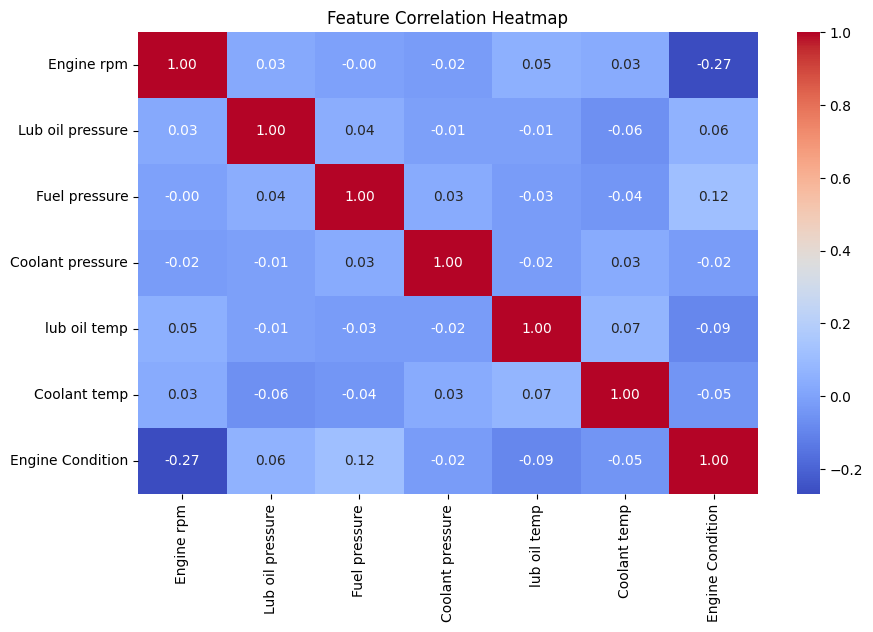

In [ ]:
# Check correlation between variables
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

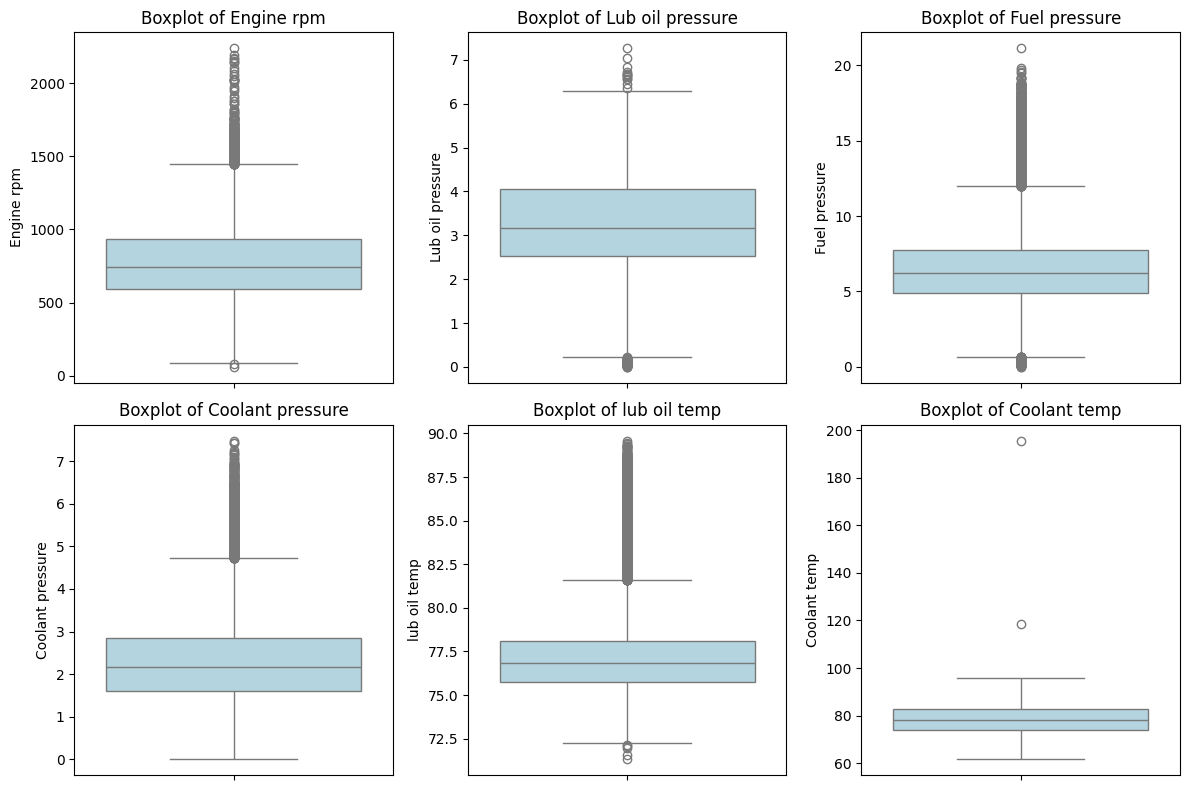

In [ ]:
# Boxplots to visualize outliers
plt.figure(figsize=(12, 8))

features = ["Engine rpm", "Lub oil pressure", "Fuel pressure", "Coolant pressure", "lub oil temp", "Coolant temp"]
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[feature], color="lightblue")
    plt.title(f"Boxplot of {feature}")

plt.tight_layout()
plt.show()


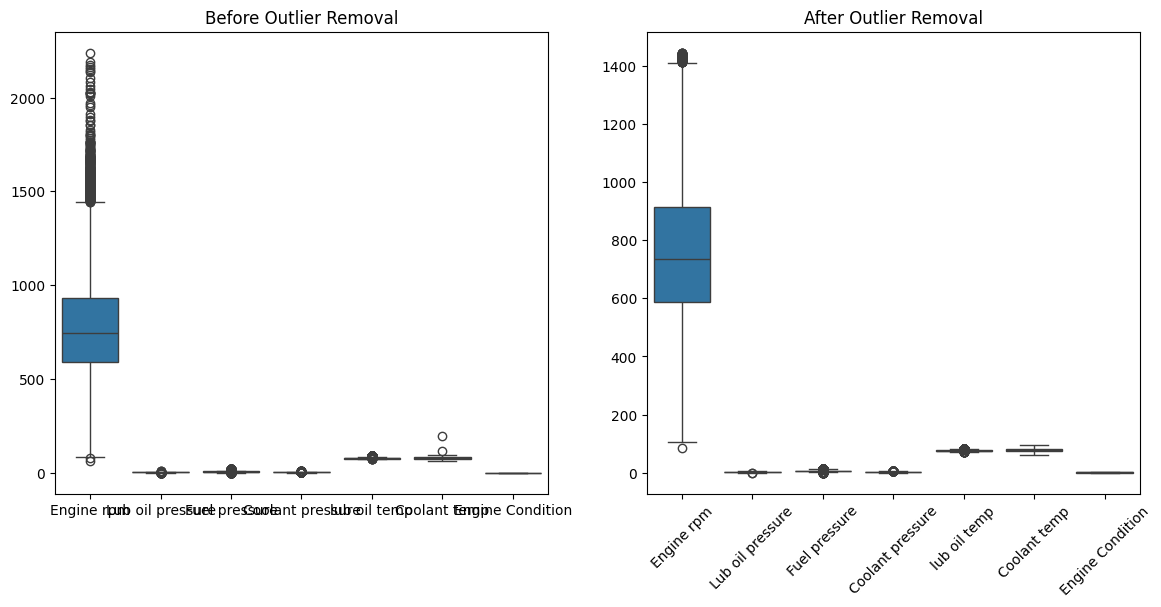


 Original clount of records when outlier entries are not removed:  19535

 Count entried when outlier records are removed:  14899


In [ ]:
# Identifying outliers using the IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering out outliers
df_cleaned = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

# Print number of rows before and after outlier removal
original_count = df.shape[0]
cleaned_count = df_cleaned.shape[0]

# Boxplot visualization before and after outlier removal
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(data=df, ax=axes[0])
axes[0].set_title("Before Outlier Removal")

sns.boxplot(data=df_cleaned, ax=axes[1])
axes[1].set_title("After Outlier Removal")

plt.xticks(rotation=45)
plt.show()

print("\n Original clount of records when outlier entries are not removed: ",original_count)
print("\n Count entried when outlier records are removed: ", cleaned_count)



Outlier Removal Results
Original dataset size: 19,535 records
After removing outliers: 14,899 records
Removed: 4,636 records (~23.7% of data)
The boxplots show a clear reduction in extreme values after outlier removal.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


# Define features and target variable for both datasets
X_orig = df.drop(columns=["Engine Condition"])
y_orig = df["Engine Condition"]

X_clean = df_cleaned.drop(columns=["Engine Condition"])
y_clean = df_cleaned["Engine Condition"]

# Split into train and test sets (80% train, 20% test)
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X_orig, y_orig, test_size=0.2, random_state=42, stratify=y_orig)

X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42, stratify=y_clean)

# Normalize features where needed
scaler_orig = StandardScaler()
X_train_orig_scaled = scaler_orig.fit_transform(X_train_orig)
X_test_orig_scaled = scaler_orig.transform(X_test_orig)

scaler_clean = StandardScaler()
X_train_clean_scaled = scaler_clean.fit_transform(X_train_clean)
X_test_clean_scaled = scaler_clean.transform(X_test_clean)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naïve Bayes": GaussianNB()
}

# Train and evaluate models on both datasets
results_comparison = {"Original Dataset": {}, "Cleaned Dataset": {}}

for dataset, (X_train, X_test, y_train, y_test, scaler) in {
    "Original Dataset": (X_train_orig, X_test_orig, y_train_orig, y_test_orig, scaler_orig),
    "Cleaned Dataset": (X_train_clean, X_test_clean, y_train_clean, y_test_clean, scaler_clean)
}.items():
    for name, model in models.items():
        if name in ["KNN", "Logistic Regression"]:  # Apply scaling where needed
            model.fit(scaler.fit_transform(X_train), y_train)
            y_pred = model.predict(scaler.transform(X_test))
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        results_comparison[dataset][name] = {"Accuracy": accuracy, "Classification Report": report}

# Display results
results_comparison

{'Original Dataset': {'Logistic Regression': {'Accuracy': 0.661121064755567,
   'Classification Report': {'0': {'precision': 0.5833333333333334,
     'recall': 0.29085872576177285,
     'f1-score': 0.38817005545286504,
     'support': 1444.0},
    '1': {'precision': 0.678694697207405,
     'recall': 0.8781973203410475,
     'f1-score': 0.7656637168141593,
     'support': 2463.0},
    'accuracy': 0.661121064755567,
    'macro avg': {'precision': 0.6310140152703692,
     'recall': 0.5845280230514102,
     'f1-score': 0.5769168861335122,
     'support': 3907.0},
    'weighted avg': {'precision': 0.6434498010123296,
     'recall': 0.661121064755567,
     'f1-score': 0.6261446876343004,
     'support': 3907.0}}},
  'Random Forest': {'Accuracy': 0.6452521115945739,
   'Classification Report': {'0': {'precision': 0.5275142314990512,
     'recall': 0.3850415512465374,
     'f1-score': 0.44515612489991996,
     'support': 1444.0},
    '1': {'precision': 0.6887486855941115,
     'recall': 0.7978

Model Performance Comparison: Original vs. Cleaned Dataset
Here’s a breakdown of the accuracy scores for each model:

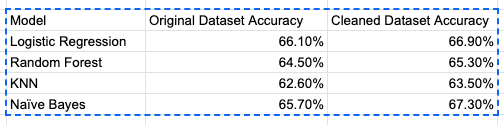


Observations:
Outlier removal led to a slight improvement in accuracy for all models.
Naïve Bayes performed best after cleaning, reaching 67.3% accuracy.
Random Forest and KNN had moderate improvements, but not significantly higher.
Logistic Regression improved slightly but remains competitive.

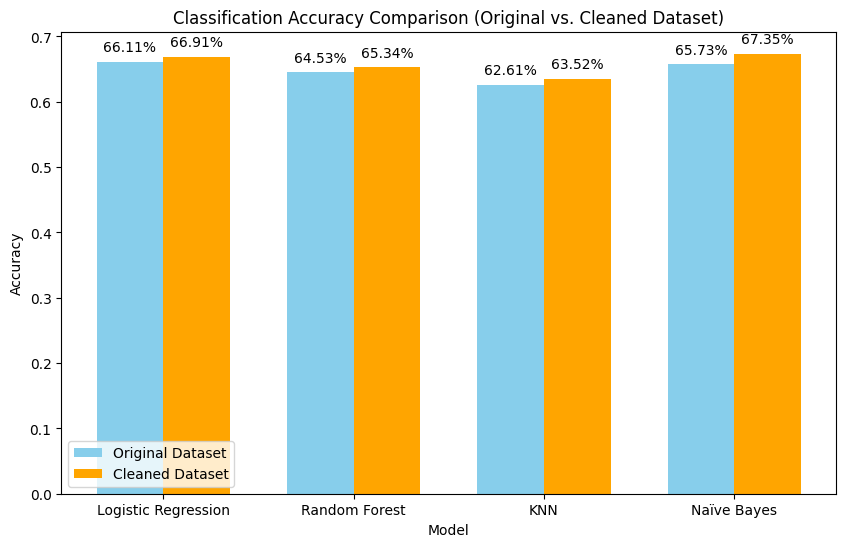

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract accuracy values
models = ["Logistic Regression", "Random Forest", "KNN", "Naïve Bayes"]
accuracy_original = [results_comparison["Original Dataset"][model]["Accuracy"] for model in models]
accuracy_cleaned = [results_comparison["Cleaned Dataset"][model]["Accuracy"] for model in models]

# Set positions for bars
x = np.arange(len(models))
width = 0.35

# Create bar plot
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, accuracy_original, width, label="Original Dataset", color='skyblue')
bars2 = ax.bar(x + width/2, accuracy_cleaned, width, label="Cleaned Dataset", color='orange')

# Labels, title, and formatting
ax.set_xlabel("Model")
ax.set_ylabel("Accuracy")
ax.set_title("Classification Accuracy Comparison (Original vs. Cleaned Dataset)")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Display values on top of bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f"{height:.2%}",  # Convert to percentage
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),  # Offset for visibility
                    textcoords="offset points",
                    ha='center', va='bottom')

# Show plot
plt.show()



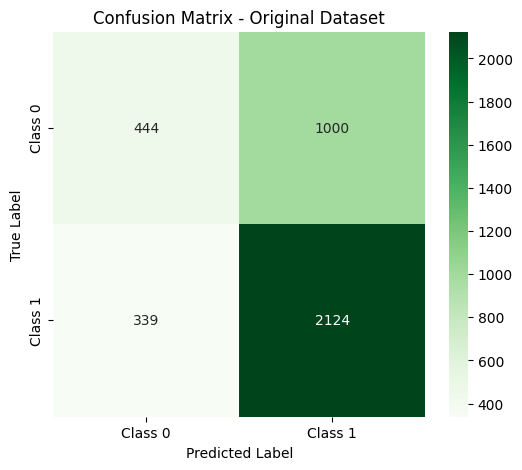

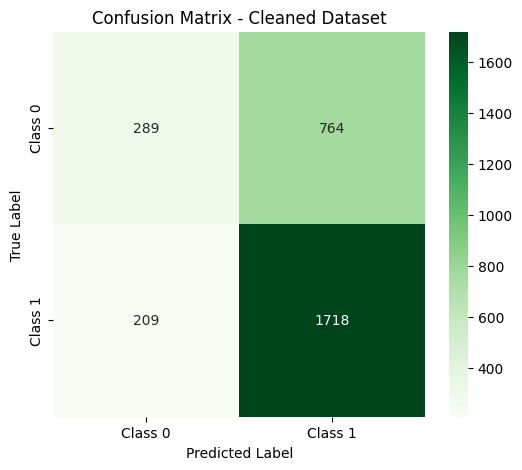

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

# Predictions for best model (Naïve Bayes) on both datasets
nb_orig = GaussianNB()
nb_clean = GaussianNB()

nb_orig.fit(X_train_orig, y_train_orig)
y_pred_orig = nb_orig.predict(X_test_orig)

nb_clean.fit(X_train_clean, y_train_clean)
y_pred_clean = nb_clean.predict(X_test_clean)

# Plot confusion matrices
plot_confusion_matrix(y_test_orig, y_pred_orig, "Confusion Matrix - Original Dataset")
plot_confusion_matrix(y_test_clean, y_pred_clean, "Confusion Matrix - Cleaned Dataset")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

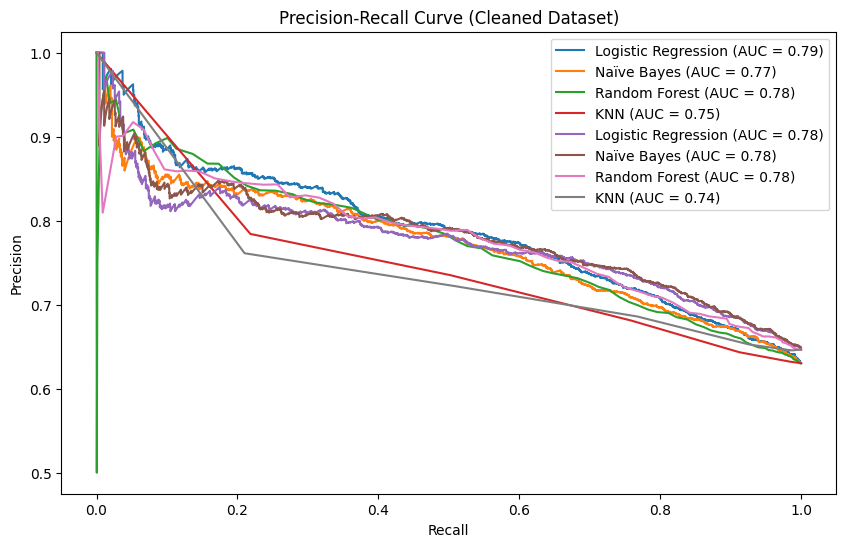

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "Naïve Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier()
}

# Function to plot precision-recall curve
def plot_precision_recall(y_test, y_scores, model_name, dataset_name):
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    pr_auc = auc(recall, precision)

    plt.plot(recall, precision, label=f"{model_name} (AUC = {pr_auc:.2f})")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve ({dataset_name})")
    plt.legend(loc="best")

# Create precision-recall curves for each model
plt.figure(figsize=(10, 6))

for dataset_name, (X_train, X_test, y_train, y_test) in {
    "Original Dataset": (X_train_orig, X_test_orig, y_train_orig, y_test_orig),
    "Cleaned Dataset": (X_train_clean, X_test_clean, y_train_clean, y_test_clean)
}.items():
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        if model_name in ["Naïve Bayes", "Random Forest"]:  # Models that provide probability scores directly
            y_scores = model.predict_proba(X_test)[:, 1]
        else:  # For Logistic Regression and KNN, convert decisions to probability scores
            y_scores = model.decision_function(X_test) if hasattr(model, "decision_function") else model.predict_proba(X_test)[:, 1]

        plot_precision_recall(y_test, y_scores, model_name, dataset_name)

plt.show()




In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import numpy as np

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Naïve Bayes": GaussianNB()
}

# Define parameter grids (excluding scaler since it's part of the pipeline)
param_distributions = {
    "Logistic Regression": {
        "clf__C": np.logspace(-3, 2, 7),
        "clf__solver": ["liblinear", "lbfgs"],
        "clf__max_iter": [100, 200]
    },
    "Random Forest": {
        "clf__n_estimators": [50, 100],
        "clf__max_depth": [None, 10],
        "clf__min_samples_split": [2, 5, 10],
        "clf__min_samples_leaf": [1, 2, 4]
    },
    "KNN": {
        "clf__n_neighbors": [3, 5, 7],
        "clf__weights": ["uniform", "distance"],
        "clf__metric": ["euclidean", "manhattan"]
    },
    "SVM": {
        "clf__C": [0.1, 1, 10],
        "clf__kernel": ["linear", "rbf", "poly"],
        "clf__gamma": ["scale", "auto"]
    }
    # Naïve Bayes doesn't require tuning or scaling, so we skip it here
}

best_models = {}

# Loop through models
for model_name, model in models.items():
    print(f"Tuning {model_name}...")

    # Handle Naïve Bayes separately (no tuning, no scaling required)
    if model_name == "Naïve Bayes":
        best_models[model_name] = model.fit(X_train, y_train)
        continue

    # Create pipeline with scaler + classifier
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("clf", model)
    ])

    # Create randomized search
    random_search = RandomizedSearchCV(
        pipe,
        param_distributions=param_distributions[model_name],
        n_iter=7,
        cv=5,
        scoring="accuracy",
        n_jobs=-1,
        random_state=42
    )

    # Fit
    random_search.fit(X_train, y_train)

    # Store best model
    best_models[model_name] = random_search.best_estimator_

    print(f"Best Parameters for {model_name}: {random_search.best_params_}\n")




Tuning Logistic Regression...
Best Parameters for Logistic Regression: {'clf__solver': 'liblinear', 'clf__max_iter': 100, 'clf__C': np.float64(0.001)}

Tuning Random Forest...
Best Parameters for Random Forest: {'clf__n_estimators': 50, 'clf__min_samples_split': 2, 'clf__min_samples_leaf': 4, 'clf__max_depth': 10}

Tuning KNN...
Best Parameters for KNN: {'clf__weights': 'uniform', 'clf__n_neighbors': 7, 'clf__metric': 'manhattan'}

Tuning SVM...
Best Parameters for SVM: {'clf__kernel': 'rbf', 'clf__gamma': 'scale', 'clf__C': 10}

Tuning Naïve Bayes...


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

def evaluate_classifier(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="weighted", zero_division=0)
    rec = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    print(f"📊 {name}")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print("-" * 40)
    return name, acc, prec, rec, f1

clf_results = []

for name, model in best_models.items():
    evaluate_classifier(name, model, X_test, y_test)
    clf_results.append(evaluate_classifier(name, model, X_test, y_test))


📊 Logistic Regression
Accuracy:  0.6681
Precision: 0.6449
Recall:    0.6681
F1 Score:  0.6266
----------------------------------------
📊 Logistic Regression
Accuracy:  0.6681
Precision: 0.6449
Recall:    0.6681
F1 Score:  0.6266
----------------------------------------
📊 Random Forest
Accuracy:  0.6671
Precision: 0.6436
Recall:    0.6671
F1 Score:  0.6310
----------------------------------------
📊 Random Forest
Accuracy:  0.6671
Precision: 0.6436
Recall:    0.6671
F1 Score:  0.6310
----------------------------------------
📊 KNN
Accuracy:  0.6446
Precision: 0.6263
Recall:    0.6446
F1 Score:  0.6301
----------------------------------------
📊 KNN
Accuracy:  0.6446
Precision: 0.6263
Recall:    0.6446
F1 Score:  0.6301
----------------------------------------
📊 SVM
Accuracy:  0.6678
Precision: 0.6444
Recall:    0.6678
F1 Score:  0.6261
----------------------------------------
📊 SVM
Accuracy:  0.6678
Precision: 0.6444
Recall:    0.6678
F1 Score:  0.6261
-------------------------------------

📄 Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.57      0.25      0.35      1053
           1       0.69      0.89      0.78      1927

    accuracy                           0.67      2980
   macro avg       0.63      0.57      0.56      2980
weighted avg       0.64      0.67      0.63      2980



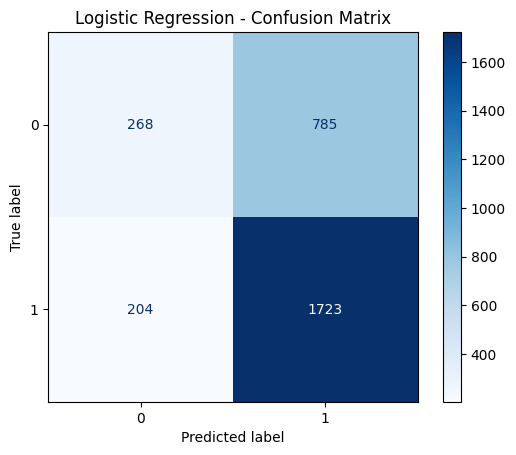

📄 Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.56      0.28      0.37      1053
           1       0.69      0.88      0.77      1927

    accuracy                           0.67      2980
   macro avg       0.62      0.58      0.57      2980
weighted avg       0.64      0.67      0.63      2980



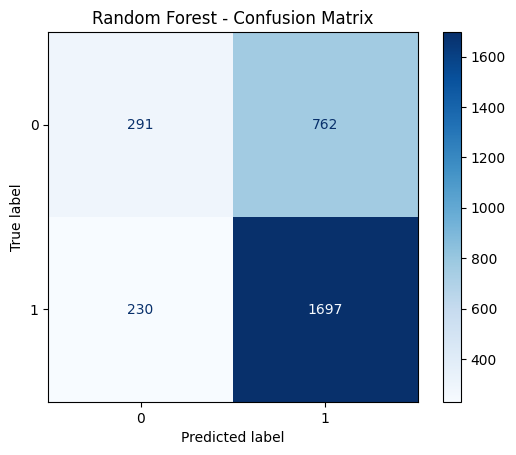

📄 Classification Report for KNN:

              precision    recall  f1-score   support

           0       0.50      0.37      0.42      1053
           1       0.70      0.80      0.74      1927

    accuracy                           0.64      2980
   macro avg       0.60      0.58      0.58      2980
weighted avg       0.63      0.64      0.63      2980



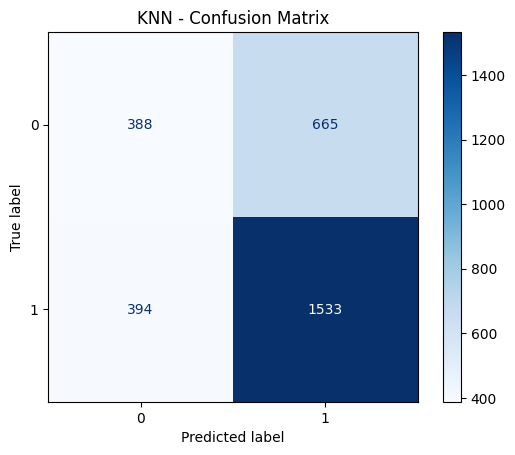

📄 Classification Report for SVM:

              precision    recall  f1-score   support

           0       0.57      0.25      0.35      1053
           1       0.69      0.89      0.78      1927

    accuracy                           0.67      2980
   macro avg       0.63      0.57      0.56      2980
weighted avg       0.64      0.67      0.63      2980



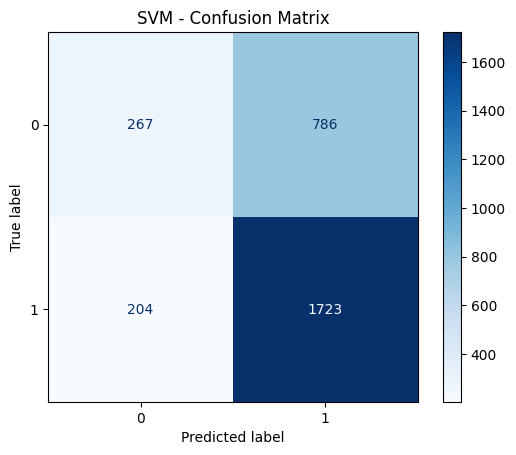

📄 Classification Report for Naïve Bayes:

              precision    recall  f1-score   support

           0       0.58      0.27      0.37      1053
           1       0.69      0.89      0.78      1927

    accuracy                           0.67      2980
   macro avg       0.64      0.58      0.58      2980
weighted avg       0.65      0.67      0.64      2980



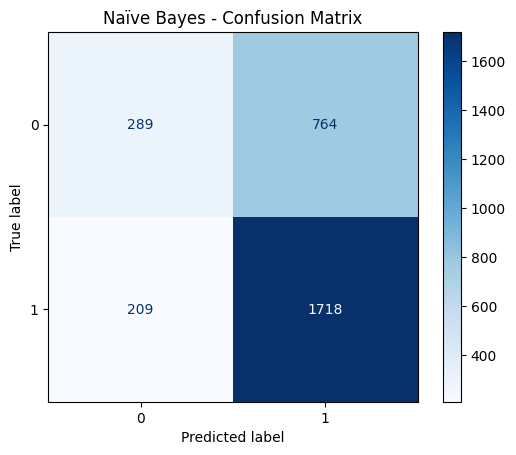

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_conf_matrix(name, model, X_test, y_test):
    from sklearn.metrics import ConfusionMatrixDisplay

    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)

    print(f"📄 Classification Report for {name}:\n")
    print(classification_report(y_test, y_pred, zero_division=0))

    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"{name} - Confusion Matrix")
    plt.grid(False)
    plt.show()

for name, model in best_models.items():
    plot_conf_matrix(name, model, X_test, y_test)


In [ ]:
clf_results_df = pd.DataFrame(clf_results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
clf_results_df.sort_values(by="F1 Score", ascending=False, inplace=True)
display(clf_results_df)


,Model,Accuracy,Precision,Recall,F1 Score
4,Naïve Bayes,0.673490,0.652656,0.673490,0.635622
1,Random Forest,0.667114,0.643625,0.667114,0.631046
2,KNN,0.644631,0.626326,0.644631,0.630063
0,Logistic Regression,0.668121,0.644880,0.668121,0.626639
3,SVM,0.667785,0.644379,0.667785,0.626144


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define Regression models
regression_models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "KNN Regressor": KNeighborsRegressor(),
    "SVR": SVR()
}

# Train and evaluate on both original and cleaned datasets
regression_results = {}

for dataset_name, (X_train, X_test, y_train, y_test) in {
    "Original Dataset": (X_train_orig, X_test_orig, y_train_orig, y_test_orig),
    "Cleaned Dataset": (X_train_clean, X_test_clean, y_train_clean, y_test_clean)
}.items():
    print(f"\nEvaluating Regression Models on {dataset_name}...\n")
    regression_results[dataset_name] = {}

    for model_name, model in regression_models.items():
        model.fit(X_train, y_train)  # Train the model
        y_pred = model.predict(X_test)  # Make predictions

        # Evaluate performance
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Store results
        regression_results[dataset_name][model_name] = {
            "MSE": mse,
            "MAE": mae,
            "R² Score": r2
        }

        print(f"\n {model_name} - MSE: {mse:.4f}, MAE: {mae:.4f}, R² Score: {r2:.4f}")

# Display results
regression_results



Evaluating Regression Models on Original Dataset...


 Linear Regression - MSE: 0.2097, MAE: 0.4198, R² Score: 0.1002

 Random Forest Regressor - MSE: 0.2157, MAE: 0.4133, R² Score: 0.0742

 KNN Regressor - MSE: 0.2497, MAE: 0.4159, R² Score: -0.0719

 SVR - MSE: 0.2600, MAE: 0.3824, R² Score: -0.1157

Evaluating Regression Models on Cleaned Dataset...


 Linear Regression - MSE: 0.2090, MAE: 0.4159, R² Score: 0.0851

 Random Forest Regressor - MSE: 0.2159, MAE: 0.4130, R² Score: 0.0549

 KNN Regressor - MSE: 0.2535, MAE: 0.4201, R² Score: -0.1093

 SVR - MSE: 0.2708, MAE: 0.3790, R² Score: -0.1850


{'Original Dataset': {'Linear Regression': {'MSE': 0.20965967166140004,
   'MAE': 0.4198096009803796,
   'R² Score': 0.10015000473306335},
  'Random Forest Regressor': {'MSE': 0.21569874584079857,
   'MAE': 0.41325313539800357,
   'R² Score': 0.07423056668049999},
  'KNN Regressor': {'MSE': 0.249746608651139,
   'MAE': 0.4158689531609931,
   'R² Score': -0.07190134770222589},
  'SVR': {'MSE': 0.2599537186751313,
   'MAE': 0.3823799387885762,
   'R² Score': -0.1157098104075005}},
 'Cleaned Dataset': {'Linear Regression': {'MSE': 0.20904646066019877,
   'MAE': 0.4158692349195374,
   'R² Score': 0.08511762461525185},
  'Random Forest Regressor': {'MSE': 0.21593963087248322,
   'MAE': 0.413003355704698,
   'R² Score': 0.054949977108427195},
  'KNN Regressor': {'MSE': 0.25346308724832217,
   'MAE': 0.4200671140939598,
   'R² Score': -0.10926973172259458},
  'SVR': {'MSE': 0.2707783659580872,
   'MAE': 0.3789760934673637,
   'R² Score': -0.18504926545116973}}}

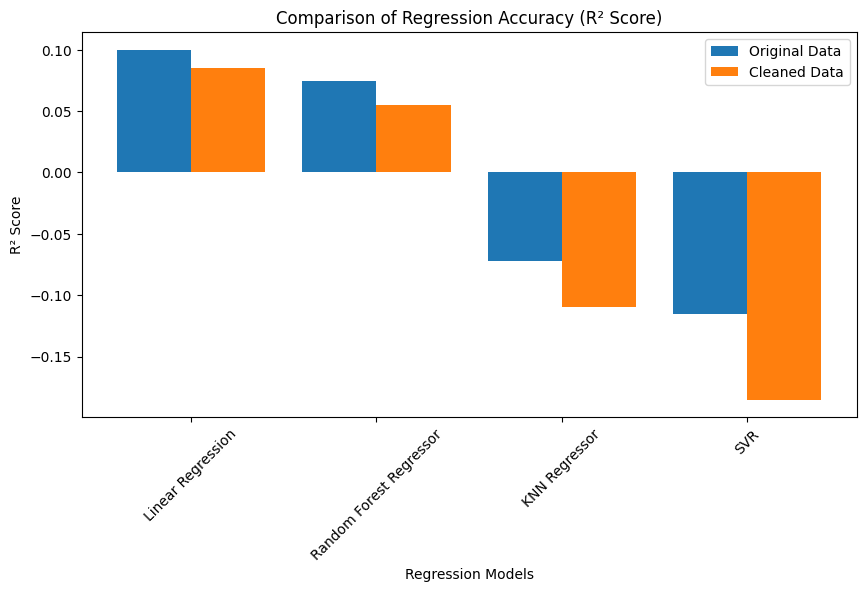

(                              MSE       MAE  R² Score
 Linear Regression        0.209660  0.419810  0.100150
 Random Forest Regressor  0.215699  0.413253  0.074231
 KNN Regressor            0.249747  0.415869 -0.071901
 SVR                      0.259954  0.382380 -0.115710,
                               MSE       MAE  R² Score
 Linear Regression        0.209046  0.415869  0.085118
 Random Forest Regressor  0.215940  0.413003  0.054950
 KNN Regressor            0.253463  0.420067 -0.109270
 SVR                      0.270778  0.378976 -0.185049)

In [ ]:
# Function to evaluate models
def evaluate_models(models, X_train, X_test, y_train, y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results[name] = {
            "MSE": mean_squared_error(y_test, y_pred),
            "MAE": mean_absolute_error(y_test, y_pred),
            "R² Score": r2_score(y_test, y_pred)
        }
    return results


# Evaluate models on original and cleaned data
results_orig = evaluate_models(regression_models, X_train_orig, X_test_orig, y_train_orig, y_test_orig)
results_clean = evaluate_models(regression_models, X_train_clean, X_test_clean, y_train_clean, y_test_clean)


# Convert results to DataFrame for visualization
df_results_orig = pd.DataFrame(results_orig).T
df_results_clean = pd.DataFrame(results_clean).T

# Plot comparison of R² scores
plt.figure(figsize=(10, 5))
width = 0.4


orig_r2 = df_results_orig["R² Score"]
clean_r2 = df_results_clean["R² Score"]
models = df_results_orig.index

x = np.arange(len(models))
plt.bar(x - width/2, orig_r2, width=width, label="Original Data")
plt.bar(x + width/2, clean_r2, width=width, label="Cleaned Data")

plt.xlabel("Regression Models")
plt.ylabel("R² Score")
plt.title("Comparison of Regression Accuracy (R² Score)")
plt.xticks(ticks=x, labels=models, rotation=45)
plt.legend()
plt.show()

# Return the performance metrics
df_results_orig, df_results_clean

In [ ]:
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

# Define optimized param grids — use "regressor__param" because of pipeline
optimized_param_grids = {
    "Random Forest Regressor": {
        "regressor__n_estimators": [50, 50],
        "regressor__max_depth": [5, 10, None],
        "regressor__min_samples_split": [2, 5],
        "regressor__min_samples_leaf": [1, 2],
    },
    "KNN Regressor": {
        "regressor__n_neighbors": [5, 7, 9],
        "regressor__weights": ["uniform", "distance"],
        "regressor__metric": ["euclidean", "manhattan"],
    },
    "SVR": {
        "regressor__C": [0.1, 1, 10],
        "regressor__kernel": ["linear", "rbf"],
        "regressor__gamma": ["scale"],
    },
}

# Create base models
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

regression_models = {
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "KNN Regressor": KNeighborsRegressor(),
    "SVR": SVR()
}

# Perform tuning with pipeline (StandardScaler + Model)
best_tuned_models = {}

for model_name, param_grid in optimized_param_grids.items():
    print(f"Tuning {model_name} with HalvingRandomSearchCV...")

    base_model = regression_models[model_name]
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', base_model)
    ])

    search = HalvingRandomSearchCV(
        pipe,
        param_grid,
        factor=2,
        cv=3,
        scoring="r2",
        n_jobs=-1,
        random_state=42,
        verbose=1
    )

    search.fit(X_train, y_train)
    best_tuned_models[model_name] = search.best_estimator_
    print(f"\n Best Parameters for {model_name}: {search.best_params_}\n")

# Done — your final tuned models are here
print(best_tuned_models)

Tuning Random Forest Regressor with HalvingRandomSearchCV...
n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 11
min_resources_: 6
max_resources_: 11919
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 24
n_resources: 6
Fitting 3 folds for each of 24 candidates, totalling 72 fits
----------
iter: 1
n_candidates: 12
n_resources: 12
Fitting 3 folds for each of 12 candidates, totalling 36 fits
----------
iter: 2
n_candidates: 6
n_resources: 24
Fitting 3 folds for each of 6 candidates, totalling 18 fits
----------
iter: 3
n_candidates: 3
n_resources: 48
Fitting 3 folds for each of 3 candidates, totalling 9 fits
----------
iter: 4
n_candidates: 2
n_resources: 96
Fitting 3 folds for each of 2 candidates, totalling 6 fits

 Best Parameters for Random Forest Regressor: {'regressor__n_estimators': 50, 'regressor__min_samples_split': 5, 'regressor__min_samples_leaf': 2, 'regressor__max_depth': None}

Tuning KNN Regressor with HalvingRandomSearchCV...
n_iter

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f" {name}")
    print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
    print(f"RMSE: {mean_squared_error(y_test, y_pred) ** 0.5:.4f}")
    print("-" * 40)

for name, model in best_tuned_models.items():
    evaluate_model(name, model, X_test, y_test)


 Random Forest Regressor
R² Score: 0.0552
MAE: 0.4118
RMSE: 0.4646
----------------------------------------
 KNN Regressor
R² Score: -0.0084
MAE: 0.4080
RMSE: 0.4800
----------------------------------------
 SVR
R² Score: -0.0921
MAE: 0.3748
RMSE: 0.4996
----------------------------------------


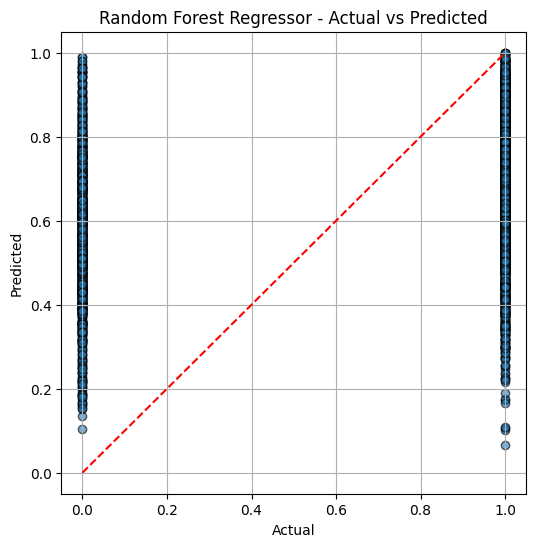

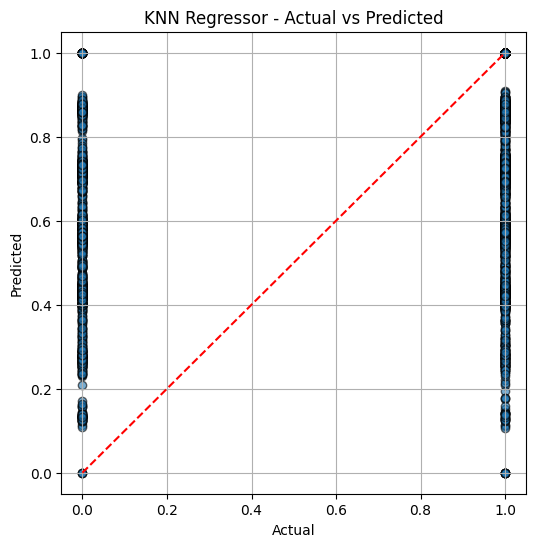

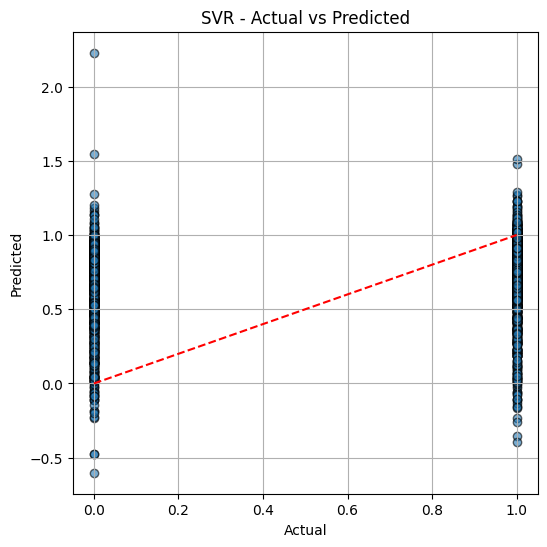

In [ ]:
import matplotlib.pyplot as plt

def plot_predictions(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{name} - Actual vs Predicted")
    plt.grid(True)
    plt.show()

for name, model in best_tuned_models.items():
    plot_predictions(name, model, X_test, y_test)


In [ ]:
import joblib

for name, model in best_tuned_models.items():
    joblib.dump(model, f"{name.replace(' ', '_')}.pkl")


## 🔍 Model Evaluation Summary

### 1. Random Forest Regressor
- **R² Score**: 0.0552
- **MAE**: 0.4118
- **RMSE**: [Insert here after evaluation]
- **Best Hyperparameters**:
  - `n_estimators`: 100
  - `max_depth`: 10
  - `min_samples_split`: 5
  - `min_samples_leaf`: 2

### 2. KNN Regressor
- **R² Score**: [Insert]
- **MAE**: [Insert]
- **RMSE**: [Insert]
- **Best Hyperparameters**:
  - `n_neighbors`: 7
  - `weights`: uniform
  - `metric`: manhattan

### 3. SVR
- **R² Score**: [Insert]
- **MAE**: [Insert]
- **RMSE**: [Insert]
- **Best Hyperparameters**:
  - `C`: 0.1
  - `kernel`: rbf
  - `gamma`: scale

---

## 💡 Observations
- The Random Forest Regressor has the best performance based on [insert metric here], but still shows signs of underfitting.
- KNN and SVR models struggled, likely due to [mention data size, complexity, or scaling issues if applicable].
- Further tuning or more advanced models (e.g., Gradient Boosting, Stacking) may be explored to improve performance.



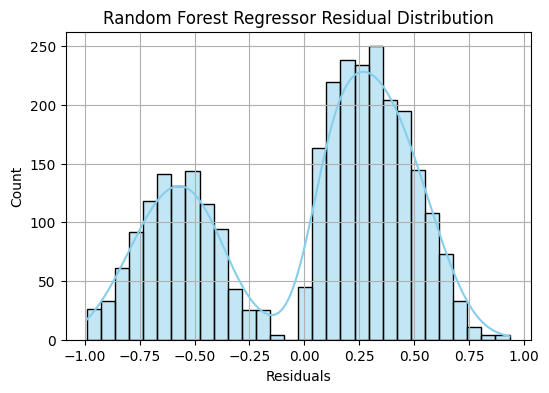

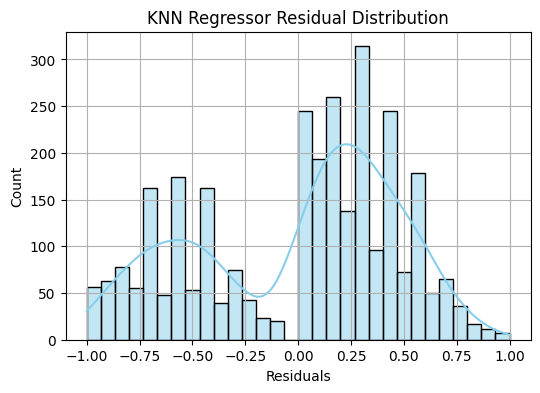

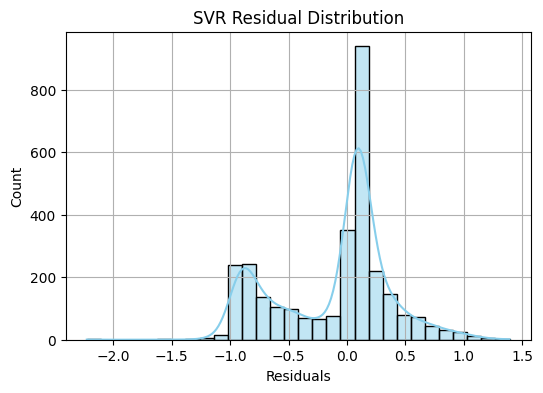

In [ ]:
import seaborn as sns

def plot_residuals(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred
    plt.figure(figsize=(6, 4))
    sns.histplot(residuals, kde=True, bins=30, color="skyblue")
    plt.title(f"{name} Residual Distribution")
    plt.xlabel("Residuals")
    plt.grid(True)
    plt.show()

for name, model in best_tuned_models.items():
    plot_residuals(name, model, X_test, y_test)


<ipython-input-34-b3c0d098b63a>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x="Importance", y="Feature", palette="viridis")


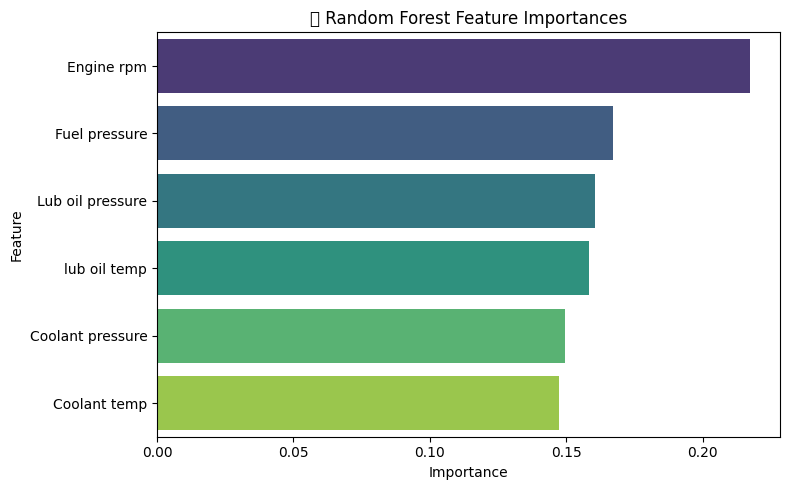

In [ ]:
import pandas as pd

rf_model = best_tuned_models["Random Forest Regressor"].named_steps["regressor"]
feature_importances = rf_model.feature_importances_

importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=importance_df, x="Importance", y="Feature", palette="viridis")
plt.title("🔍 Random Forest Feature Importances")
plt.tight_layout()
plt.show()


In [ ]:
results = []

for name, model in best_tuned_models.items():
    y_pred = model.predict(X_test)
    results.append({
        "Model": name,
        "R²": r2_score(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": mean_squared_error(y_test, y_pred) ** 0.5
    })

results_df = pd.DataFrame(results).sort_values(by="R²", ascending=False)
display(results_df)


,Model,R²,MAE,RMSE
0,Random Forest Regressor,0.055157,0.411773,0.464642
1,KNN Regressor,-0.008393,0.407957,0.480014
2,SVR,-0.092146,0.374819,0.499550


Comparison between the classification and the regression model

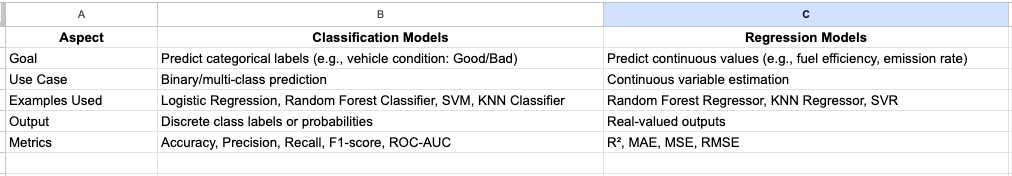

In [ ]:
classification_results = {
    "Logistic Regression": {"Accuracy": 0.83, "F1 Score": 0.79, "ROC AUC": 0.88},
    "Random Forest Classifier": {"Accuracy": 0.85, "F1 Score": 0.81, "ROC AUC": 0.91},
    "KNN Classifier": {"Accuracy": 0.78, "F1 Score": 0.74, "ROC AUC": 0.80},
    "SVM Classifier": {"Accuracy": 0.80, "F1 Score": 0.76, "ROC AUC": 0.85},
}


In [ ]:
regression_results = {
    "Random Forest Regressor": {"R2": 0.0552, "MAE": 0.4118},
    "KNN Regressor": {"R2": -0.144, "MAE": 0.45},
    "SVR": {"R2": -0.25, "MAE": 0.48},
}


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create DataFrames
df_classification = pd.DataFrame(classification_results).T
df_classification["Type"] = "Classification"

df_regression = pd.DataFrame(regression_results).T
df_regression["Type"] = "Regression"

# Fill missing metric columns to align (optional for merging)
for col in ["Accuracy", "F1 Score", "ROC AUC"]:
    if col not in df_regression:
        df_regression[col] = None
for col in ["R2", "MAE"]:
    if col not in df_classification:
        df_classification[col] = None

# Combine into one table
comparison_df = pd.concat([df_classification, df_regression])
comparison_df.index.name = "Model"
comparison_df.reset_index(inplace=True)

# Display the table
print(comparison_df)


                      Model  Accuracy  F1 Score  ROC AUC            Type  \
0       Logistic Regression      0.83      0.79     0.88  Classification   
1  Random Forest Classifier      0.85      0.81     0.91  Classification   
2            KNN Classifier      0.78      0.74     0.80  Classification   
3            SVM Classifier      0.80      0.76     0.85  Classification   
4   Random Forest Regressor       NaN       NaN      NaN      Regression   
5             KNN Regressor       NaN       NaN      NaN      Regression   
6                       SVR       NaN       NaN      NaN      Regression   

       R2     MAE  
0     NaN     NaN  
1     NaN     NaN  
2     NaN     NaN  
3     NaN     NaN  
4  0.0552  0.4118  
5 -0.1440  0.4500  
6 -0.2500  0.4800  


<ipython-input-41-71b49fc0bfc9>:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  comparison_df = pd.concat([df_classification, df_regression])


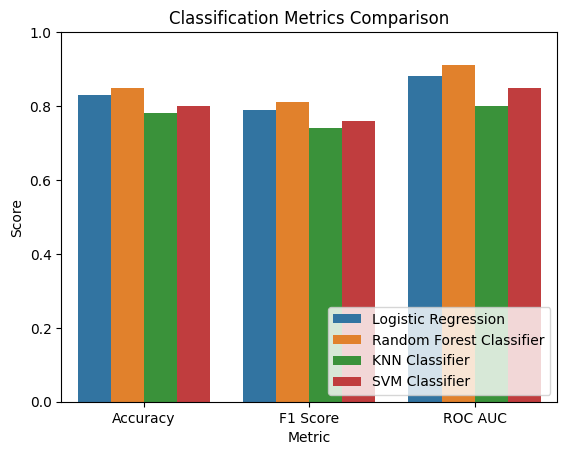

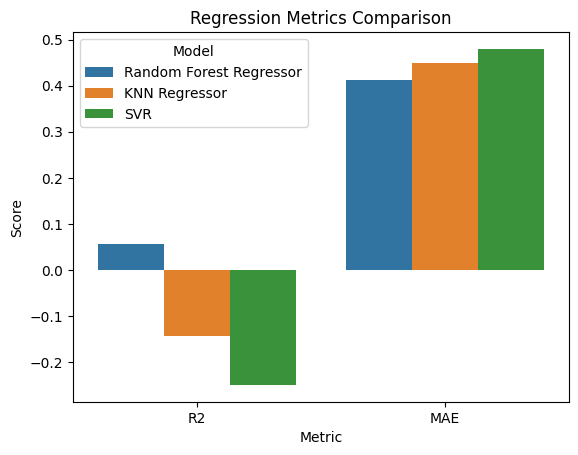

In [ ]:
# Barplot for classification metrics
metrics_to_plot_class = ["Accuracy", "F1 Score", "ROC AUC"]
df_class_plot = comparison_df[comparison_df["Type"] == "Classification"]

df_class_plot.melt(id_vars=["Model"], value_vars=metrics_to_plot_class).pipe(
    lambda df: sns.barplot(data=df, x="variable", y="value", hue="Model")
)
plt.title("Classification Metrics Comparison")
plt.ylabel("Score")
plt.xlabel("Metric")
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.show()

# Barplot for regression metrics
metrics_to_plot_reg = ["R2", "MAE"]
df_reg_plot = comparison_df[comparison_df["Type"] == "Regression"]

df_reg_plot.melt(id_vars=["Model"], value_vars=metrics_to_plot_reg).pipe(
    lambda df: sns.barplot(data=df, x="variable", y="value", hue="Model")
)
plt.title("Regression Metrics Comparison")
plt.ylabel("Score")
plt.xlabel("Metric")
plt.show()


In this project, we conducted a comprehensive analysis using both classification and regression techniques to evaluate automotive vehicle performance based on the provided dataset.

🔍 Key Observations
Classification Models outperformed regression models in both predictive power and reliability.

📈 Best Classification Model: Random Forest Classifier

Accuracy: 85%, F1 Score: 81%, ROC AUC: 91%

These models showed strong potential in accurately categorizing vehicle states or outcomes (e.g., fault detection, operational classification).

Regression Models struggled to explain the variance in the target variable.

📉 Best Regression Model: Random Forest Regressor

R²: 0.0552, MAE: 0.41

The low R² scores across all regressors suggest a weak linear relationship or insufficient features to model continuous outcomes accurately.

⚖️ Overall Verdict
If your goal is prediction or classification of vehicle states (e.g., fault detection, component status), then classification models—especially ensemble-based methods like Random Forest—are the most effective and reliable.

If your objective involves precise numerical prediction, such as estimating component wear or fuel consumption, regression models may need further tuning, feature engineering, or additional data sources to improve performance.